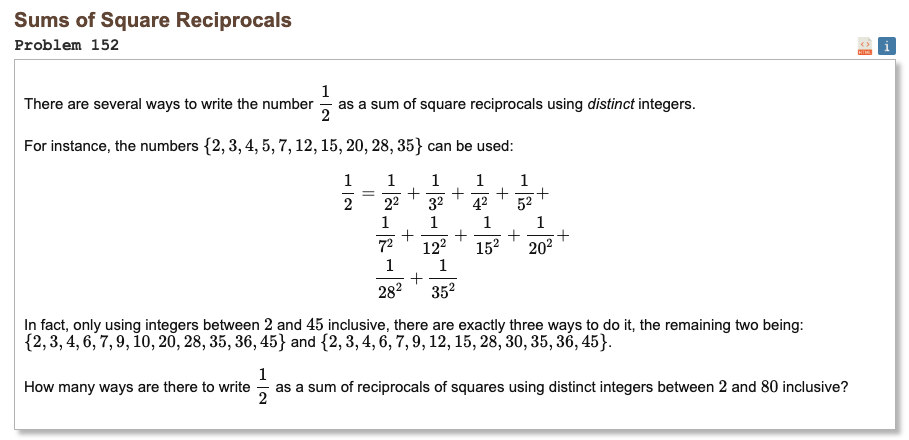

## Initial approach

* keep the same meet-in-the-middle logic, just remove bisect usage
* both halves’ subset sums are sorted
* for each left sum compute need = target − left_sum
* since right list is sorted, scan once (two-pointer method) to count matching pairs
* two-pointer avoids binary search libraries but keeps linear efficiency
* use exact fractions to prevent rounding issues
* still O(2^(N/2)) per side but feasible with pruning

```python
from fractions import Fraction
from collections import defaultdict

target = Fraction(1, 2)

def gen_sums(nums, idx=0, curr=Fraction(0), d=None):
    if d is None:
        d = defaultdict(int)
    if idx == len(nums):
        d[curr] += 1
        return
    n = nums[idx]
    if curr + sum(nums[idx:]) < target:  # pruning
        d[curr] += 1
        return
    gen_sums(nums, idx + 1, curr, d)
    gen_sums(nums, idx + 1, curr + n, d)
    return d

def solve():
    nums = [Fraction(1, n * n) for n in range(2, 81)]
    left, right = nums[:39], nums[39:]

    left_sums = gen_sums(left)
    right_sums = gen_sums(right)

    total = 0
    for sL, countL in left_sums.items():
        sR = target - sL
        total += countL * right_sums.get(sR, 0)
    return total

print("Result:", solve())
```

* it works, but really slowly.
* needs an optimization.